In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Statistical Analysis
from scipy import stats

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pipelines
from sklearn.pipeline import Pipeline
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering ,DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram


# Hyperparameter Tuning
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer
sns.set()

rng = np.random.RandomState(42)

from warnings import filterwarnings 
filterwarnings('ignore')

df = pd.read_csv('./data/Customer_Dataset.csv')

In [109]:
df.head(8)

,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [111]:
df.describe()

,CustomerID,Age,Income (k$),How Much They Spend
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---

## Univariate Analysis

In [112]:
# sns.displot(x='Income (k$)', kde=True, height=8, data=df)
# plt.title('Distribution of Income')
# plt.show()


In [113]:
# sns.displot(x='How Much They Spend', kde=True, height=8, data=df, color='black')
# plt.title('Distribution of Spending')
# plt.show()


In [114]:
# sns.displot(x='Age', kde=True, height=8, data=df, color = 'orange')
# plt.title('Distribution of age of customers')
# plt.show()

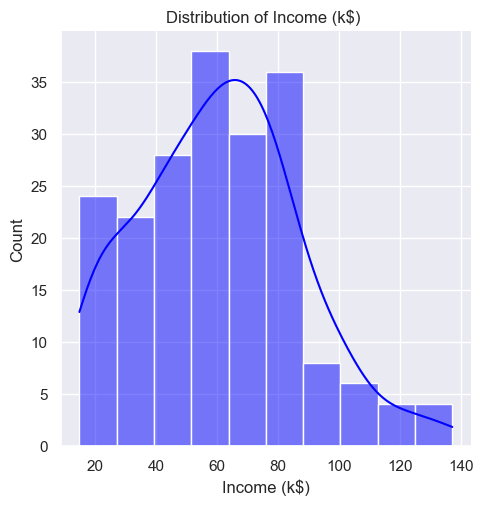

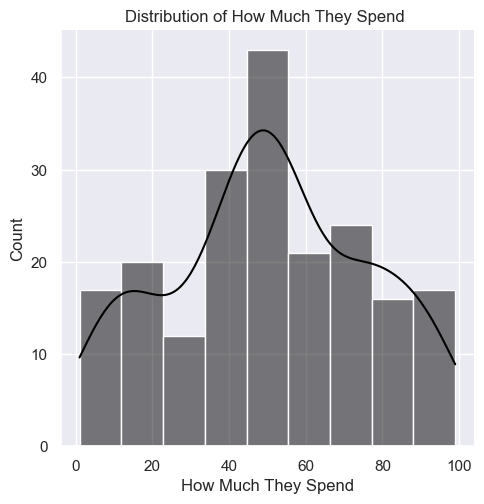

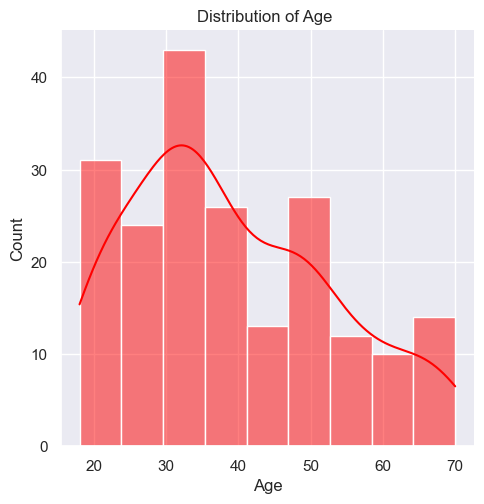

In [115]:
# Define the x-axis values and colors
x_values = ['Income (k$)', 'How Much They Spend', 'Age']
colors = ['blue', 'black', 'red']

# Loop through the x_values and colors
for x, color in zip(x_values, colors):
    sns.displot(x=x, kde=True, height=5, data=df, color=color)
    plt.title(f"Distribution of {x} ")
    plt.show()

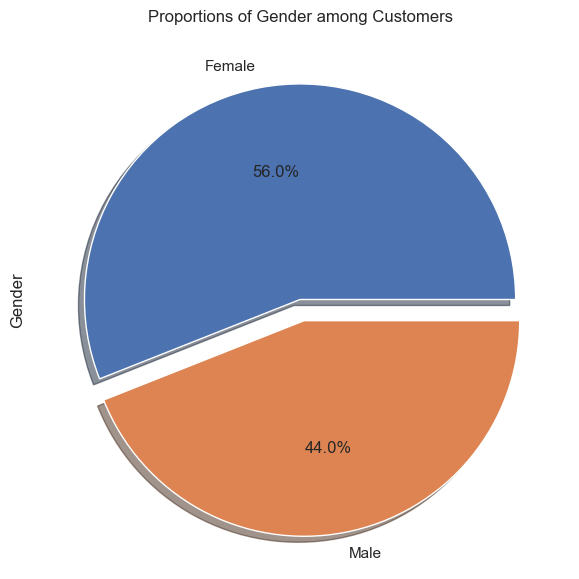

In [116]:
# pie chart on resign status
fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor("white")
df["Gender"].value_counts().plot.pie(
    title="Proportions of Gender among Customers",
    legend=False,
    autopct="%1.1f%%",
    explode=(0, 0.1),
    shadow=True,
    startangle=0,
)
plt.show()

---

## Visualizing the dataset as a whole

In [117]:
df
df = pd.read_csv('./data/Customer_Dataset.csv')

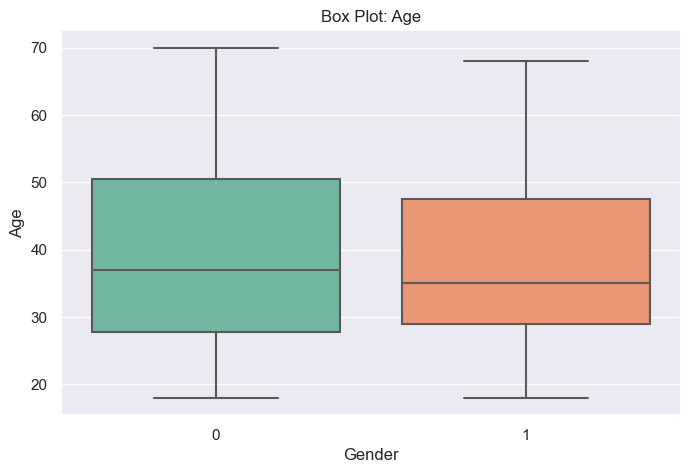

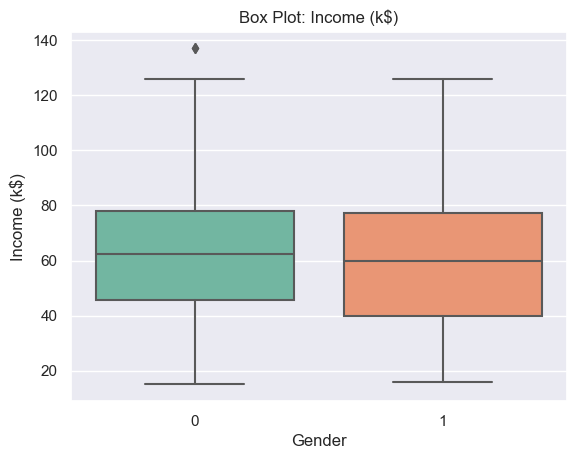

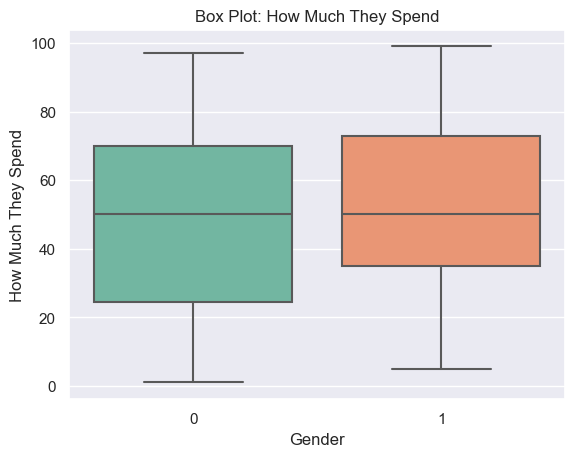

In [124]:
plt.figure(figsize=(8, 5))



# Iterate over each feature
for feature in df.columns:
    if feature != 'Gender' and feature != 'CustomerID':  # Exclude the 'gender' column
        sns.boxplot(x='Gender', y=feature, data=df, palette='Set2')
        plt.title(f"Box Plot: {feature}")
        plt.xlabel("Gender")
        plt.ylabel(feature)
        plt.show()

silhouette_score testing

In [119]:
df = pd.read_csv('./data/Customer_Dataset.csv')
# Convert gender to numerical values (e.g., 0 for male, 1 for female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Perform K-means clustering with gender as a feature
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

# Calculate the silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3766801400675223


In [120]:
df_testing = df.drop('Gender', axis=1)


k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_testing)

# Calculate the silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_testing, labels)

print("Silhouette Score without Gender:", silhouette_avg)


Silhouette Score without Gender: 0.37674423270868146


# References

---

# Chicken Parmesan Recipe

## Ingredients
- 2 boneless, skinless chicken breasts
- 1 cup bread crumbs
- 1/2 cup grated Parmesan cheese
- 1/2 cup all-purpose flour
- 2 large eggs, beaten
- 1 cup marinara sauce
- 1 cup shredded mozzarella cheese
- 2 tablespoons olive oil
- Salt and pepper, to taste

## Instructions
1. Preheat the oven to 375°F (190°C).
2. In a shallow bowl, mix together the bread crumbs and grated Parmesan cheese.
3. Season the chicken breasts with salt and pepper.
4. Dredge each chicken breast in the flour, dip it into the beaten eggs, and then coat it with the bread crumb mixture.
5. In a large skillet, heat the olive oil over medium-high heat.
6. Add the breaded chicken breasts to the skillet and cook until golden brown on both sides, about 3-4 minutes per side.
7. Remove the chicken from the skillet and place it in a baking dish.
8. Pour the marinara sauce over the chicken breasts, covering them evenly.
9. Sprinkle the shredded mozzarella cheese over the top.
10. Bake in the preheated oven for 20-25 minutes, or until the chicken is cooked through and the cheese is melted and bubbly.
11. Remove from the oven and let it rest for a few minutes before serving.
12. Serve the Chicken Parmesan hot with pasta or a side of your choice.

Enjoy your delicious Chicken Parmesan!